In [1]:
import numpy as np
import networkx as nx

In [4]:
point_cloud = np.array([[0,0], [2,-0.2], [4,0.2], [0,-1.5], [2,-3], [4,-1], [3.8,-2.5]] )
EPSILON = 10


In [19]:
def create_dicts(points, threshold):
    edict = {}
    ndict = {}

    for i, vertex in enumerate(points[:-1]):
        ndict[i] = []
        for j, other_v in enumerate(points[i+1:]):
            distance = np.linalg.norm(vertex - other_v)
            if distance <= threshold:
                edict[(i, j+i+1)] = distance
                ndict[i] += [j+i+1]

    ndict[len(points)-1] = []
                
    return edict, ndict




In [20]:
create_dicts(point_cloud, EPSILON)

({(0, 1): 2.009975124224178,
  (0, 2): 4.004996878900157,
  (0, 3): 1.5,
  (0, 4): 3.605551275463989,
  (0, 5): 4.123105625617661,
  (0, 6): 4.548626166217663,
  (1, 2): 2.039607805437114,
  (1, 3): 2.3853720883753127,
  (1, 4): 2.8,
  (1, 5): 2.154065922853802,
  (1, 6): 2.920616373302046,
  (2, 3): 4.346262762420146,
  (2, 4): 3.773592452822642,
  (2, 5): 1.2,
  (2, 6): 2.7073972741361767,
  (3, 4): 2.5,
  (3, 5): 4.031128874149275,
  (3, 6): 3.9293765408777,
  (4, 5): 2.8284271247461903,
  (4, 6): 1.8681541692269403,
  (5, 6): 1.5132745950421556},
 {0: [1, 2, 3, 4, 5, 6],
  1: [2, 3, 4, 5, 6],
  2: [3, 4, 5, 6],
  3: [4, 5, 6],
  4: [5, 6],
  5: [6],
  6: []})

In [21]:
def ECC_recursive(point_cloud, epsilon):
    
    ECC_list = []

    for i, vertex in enumerate(point_cloud):
        
        #create local graph
        #G_i = create_graph_from_pointcloud(point_cloud[i:], epsilon)
        
        edict, ndict = create_dicts(point_cloud[i:], epsilon) 
        
        ECC_list.append( extend_clique(clique={0}, # only the first vertex (the one for wich we want the star)
                                       neighbors=set(ndict[0]), # neigh of the first vertex
                                       filtration=0, 
                                       edict=edict,
                                       ndict=ndict,
                                       # remember, list are passed by reference!
                                       contributions_list=ECC_list) )

    
    return(sorted(ECC_list, key = lambda x: x[0]))  

In [22]:
def extend_clique(clique, neighbors, filtration, edict, ndict, contributions_list):
        
    while len(neighbors) > 0:
        # removes the first common neighbour and add it to the clique
        to_add = neighbors.pop()
        
        # find new filtration by cheching the new edges
        new_filtration = filtration
        for v in clique:
            if edict[(v,to_add)] > new_filtration:
                new_filtration = edict[(v,to_add)]
        
        contributions_list.append(extend_clique(clique.union({to_add}), 
                                      neighbors.intersection(ndict[to_add]), 
                                      new_filtration,
                                      edict,
                                      ndict,
                                      contributions_list) )
        
    return [filtration, (-1)**(len(clique)-1)]  

In [23]:
from matplotlib import pyplot as plt
import ecc_plot

In [24]:
c_ls = ECC_recursive(point_cloud, EPSILON)

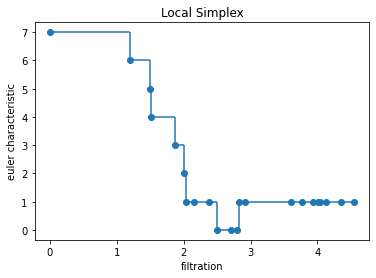

In [25]:
e_ls = ecc_plot.euler_characteristic_list_from_all(c_ls)
ecc_plot.plot_euler_curve(e_ls, True, "Local Simplex")